### Step 5 – Artificial Neural Network (Feedforward)

1. Create and train a **fully connected feedforward Artificial Neural Network (ANN)** to classify the two true classes.  
2. Plot the **decision boundary** of the ANN and compare it with the one obtained using Logistic Regression.  
3. Compute the performance metrics: **accuracy, precision, recall, F1-score**.
***

### ⚙️ When to Use an Artificial Neural Network (ANN)

- ✅ Use it when:
  - The decision boundary is **non-linear/complex** and simpler linear models underfit.
  - You need **flexibility** and universal function approximation.
  - Inputs are **numeric and standardized**, and you can tune hyperparameters.

- 🚫 Avoid it when:
  - The dataset is **small** and nearly **linearly separable** (Logistic Regression is simpler and more interpretable).
  - You need **strong explainability** or have tight compute constraints.
  - Features are **not scaled** or mostly **categorical** without proper encoding.
***

### 🤖 **Model Hyperparameters**

- **Preprocessing:** `StandardScaler()` — input normalization  
- `hidden_layer_sizes = (8, 4, 4)` — number of neurons per hidden layer  
- `activation = "relu"` — activation function in hidden layers  
- `solver = "adam"` — optimizer for weight updates  
- `alpha = 0.001` — L2 regularization term  
- `learning_rate_init = 0.0001` — initial learning rate  
- `max_iter = 1000` — maximum training iterations  
- `random_state = 42` — reproducibility of initialization
***

In [1]:
%run 00-setup.py

In [2]:
from tasks.ann import run_ann

from ml.data import load_dataset
from ml.viz import plt_dboundary, plt_cmatrix

from sklearn.model_selection import train_test_split

In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
res = run_ann(
    X_train, y_train, X_test, y_test,

    params={
        "hidden_layers": (8, 4, 4),
        "activation": "relu",
        "alpha": 0.001,
        "learning_rate_init": 0.0001,
        "max_iter": 1000,
        "seed": 42
    }
)

In [5]:
print("Test:", res["test"]["metrics"])

Test: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


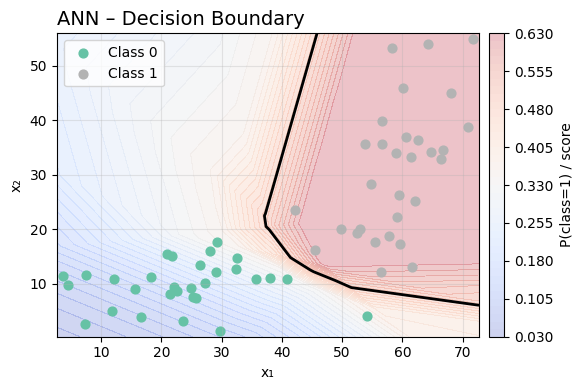

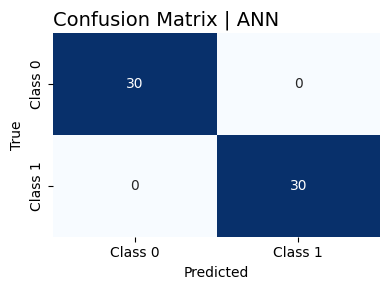

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | ANN'}, xlabel='Predicted', ylabel='True'>)

In [6]:
plt_dboundary(
    res["model"],
    X_test,
    y_test,
    title="ANN – Decision Boundary"
)

plt_cmatrix(
    y_true=y_test,
    y_pred=res["test"]["y_pred"],
    title="Confusion Matrix | ANN"
)